In [1]:
!pip install mlxtend


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


In [3]:
df = pd.read_csv("OnlineRetail.csv", encoding="ISO-8859-1")

In [4]:
df.dropna(subset=['CustomerID'], inplace=True)


In [5]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]


In [6]:
df = df[df['Quantity'] > 0]

In [7]:
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)


In [8]:
basket_binary = basket.applymap(lambda x: 1 if x > 0 else 0)

basket_binary.head()

C:\Users\loges\AppData\Local\Temp\ipykernel_21464\1769965886.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_binary = basket.applymap(lambda x: 1 if x > 0 else 0)


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
top_items = df['Description'].value_counts().head(100).index
df_filtered = df[df['Description'].isin(top_items)]

In [13]:
basket = df_filtered.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)
basket_binary = basket.applymap(lambda x: 1 if x > 0 else 0)


C:\Users\loges\AppData\Local\Temp\ipykernel_21464\2244964847.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_binary = basket.applymap(lambda x: 1 if x > 0 else 0)


In [14]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_items = apriori(basket_binary, min_support=0.01, use_colnames=True)
frequent_items.sort_values(by='support', ascending=False).head()


C:\Users\loges\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
95,0.130590,(WHITE HANGING HEART T-LIGHT HOLDER)
77,0.112900,(REGENCY CAKESTAND 3 TIER)
37,0.106009,(JUMBO BAG RED RETROSPOT)
64,0.091433,(PARTY BUNTING)
6,0.091102,(ASSORTED COLOUR BIRD ORNAMENT)


In [15]:
rules = association_rules(frequent_items, metric="lift", min_threshold=1.0)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()



,antecedents,consequents,support,confidence,lift
0,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 DINOSAUR CAKE CASES),0.014775,0.339422,9.684103
1,(PACK OF 60 DINOSAUR CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.014775,0.421550,9.684103
2,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.018552,0.426180,9.614841
3,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.018552,0.418535,9.614841
4,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.021864,0.502283,7.367307


In [16]:
strong_rules = rules[(rules['lift'] >= 3) & (rules['confidence'] >= 0.5)]
strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


,antecedents,consequents,support,confidence,lift
4,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.021864,0.502283,7.367307
7,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.022726,0.559543,10.703658
8,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.035116,0.671736,11.560453
9,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.035116,0.604333,11.560453
10,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.026237,0.646003,11.117591
...,...,...,...,...,...
1430,"(LUNCH BAG SPACEBOY DESIGN , LUNCH BAG WOODLAN...",(LUNCH BAG PINK POLKADOT),0.010601,0.620155,10.053706
1431,"(LUNCH BAG SPACEBOY DESIGN , LUNCH BAG WOODLAN...",(LUNCH BAG RED RETROSPOT),0.010601,0.800000,9.374534
1432,"(LUNCH BAG SPACEBOY DESIGN , LUNCH BAG PINK PO...",(LUNCH BAG WOODLAND),0.010601,0.637450,11.732971
1433,"(LUNCH BAG WOODLAND, LUNCH BAG PINK POLKADOT, ...",(LUNCH BAG SPACEBOY DESIGN ),0.010601,0.675105,10.313125


In [17]:
strong_rules = rules[(rules['lift'] >= 3) & (rules['confidence'] >= 0.5)]
strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()


,antecedents,consequents,support,confidence,lift
4,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.021864,0.502283,7.367307
7,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.022726,0.559543,10.703658
8,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.035116,0.671736,11.560453
9,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.035116,0.604333,11.560453
10,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.026237,0.646003,11.117591


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


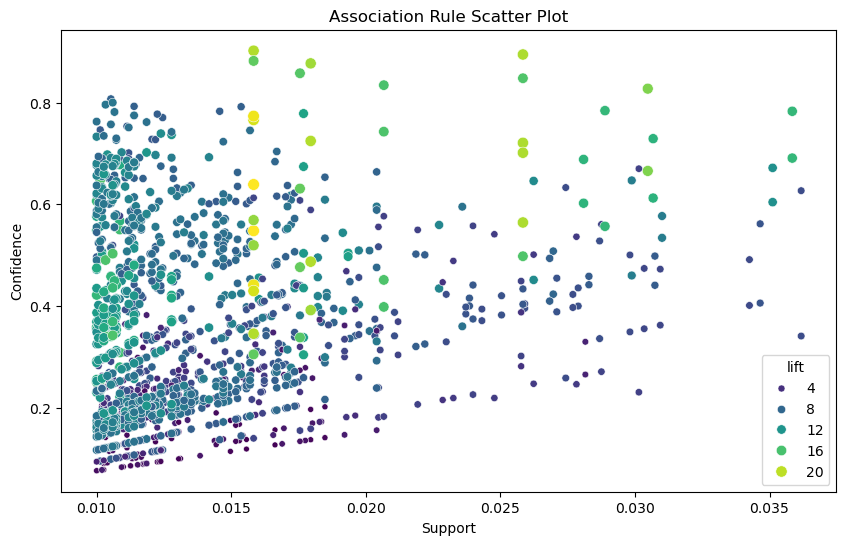

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='viridis', legend=True)
plt.title("Association Rule Scatter Plot")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()